<a href="https://colab.research.google.com/github/mdmashroof32/Advancejava/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/sample_data/Bank Customer Churn Prediction.csv")

In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

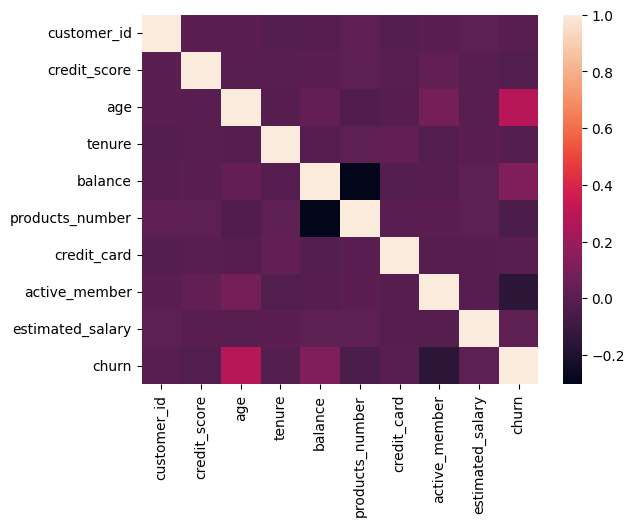

In [ ]:
num_data =data.drop(columns=['country','gender'])
cors = num_data.corr()
sns.heatmap(cors)

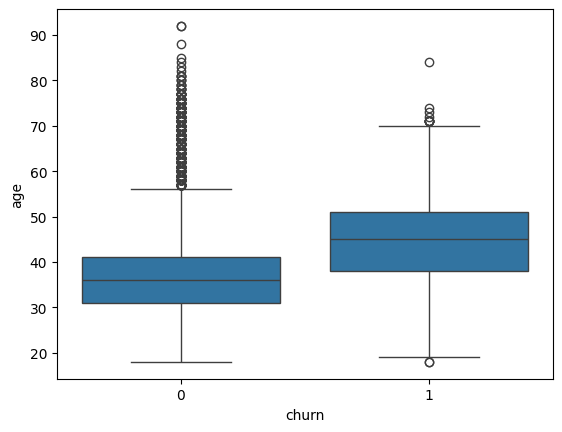

In [ ]:
sns.boxplot(x="churn",y="age",data=data)

plt.show()

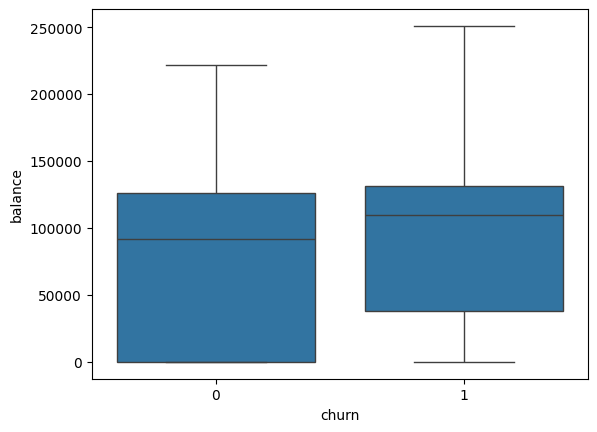

In [ ]:
sns.boxplot(x="churn",y="balance",data=data)
plt.show()

<Axes: xlabel='churn', ylabel='credit_score'>

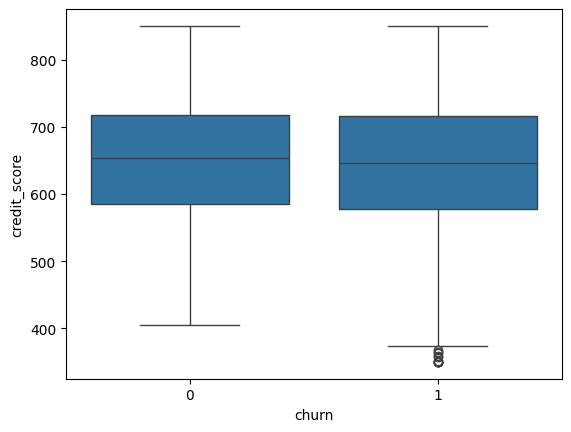

In [ ]:
sns.boxplot(x="churn",y="credit_score",data=data)

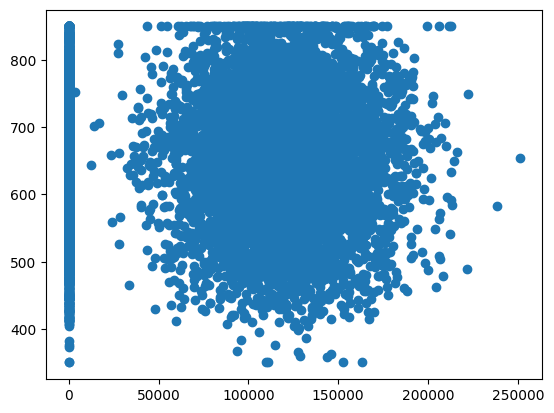

In [ ]:
plt.scatter(data['balance'],data['credit_score'])
plt.show()

In [ ]:
data["gender"].value_counts()

,count
gender,
Male,5457
Female,4543


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['encoded'] = encoder.fit_transform(data['gender'])
data[['churn','encoded']].head()

In [ ]:
data['encoded'].value_counts()

,count
encoded,
1,5457
0,4543


In [ ]:
m_vlues=5457
f_vlues=4543
m_churn,f_churn=0,0
for i in range(0,len(data)):
  if(data['churn'][i]==1 and data['encoded'][i]==1):
    m_churn+=1
  elif(data['churn'][i]==1 and data['encoded'][i]==0):
    f_churn+=1

In [ ]:
x=[m_churn,f_churn]
print(x)

[898, 1139]


<BarContainer object of 2 artists>

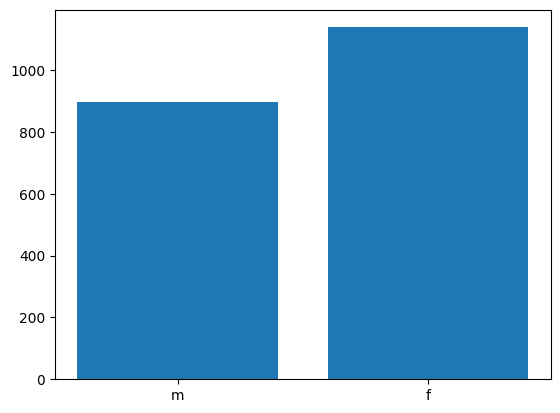

In [ ]:
plt.bar(['m','f'],[m_churn,f_churn])

In [ ]:
y=data['churn']
x=data[['age','credit_score','encoded','tenure','balance','products_number','credit_card','active_member','estimated_salary']]

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaling =StandardScaler()
scaling.fit(x_tr)

StandardScaler()

In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(x_tr,y_tr)
u=model.score(x_ts,y_ts)
print(u)

0.774


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.coef_

array([[ 4.57866422e-02, -4.54238451e-03, -2.82667140e-02,
        -6.79321849e-02,  3.65455977e-06, -2.22856656e-02,
        -9.27381610e-03, -4.70079085e-02, -1.45747940e-06]])

In [ ]:
from sklearn.pipeline import make_pipeline
test_score=[]
for lam in np.arange(0.01,100,0.1):
  pipe =make_pipeline(StandardScaler(),LogisticRegression(C=1/lam))
  pipe.fit(x_tr,y_tr)
  scores=pipe.score(x_ts,y_ts)
  test_score.append(scores)

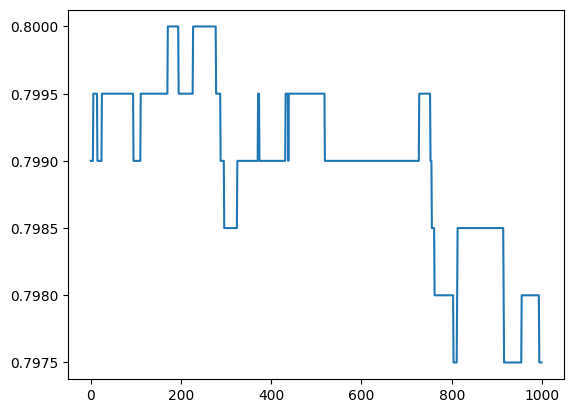

In [ ]:
plt.plot(test_score)


In [ ]:
print(np.argmax(test_score))

171


In [ ]:
l_best=0.01*171*0.1
print(l_best)


0.171
